In [2]:
from tqdm.notebook import tqdm
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import statistics
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [3]:
movie_df = pd.read_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
movie_df['개봉일'] = pd.to_datetime(movie_df['개봉일'])
movie_df['기준일'] = pd.to_datetime(movie_df['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
movie_df['기준연도'] = movie_df['기준일'].apply(lambda x : x.year)
movie_df['기준월'] = movie_df['기준일'].apply(lambda x : x.month)
movie_df['개봉연도'] = movie_df['개봉일'].apply(lambda x : x.year)
movie_df['개봉월'] = movie_df['개봉일'].apply(lambda x : x.month)

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482752 entries, 0 to 482751
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   순위      482752 non-null  int64         
 1   영화명     482752 non-null  object        
 2   개봉일     482752 non-null  datetime64[ns]
 3   등급      476018 non-null  object        
 4   장르      482752 non-null  object        
 5   대표국적    482714 non-null  object        
 6   국적      482714 non-null  object        
 7   제작사     213248 non-null  object        
 8   배급사     465038 non-null  object        
 9   감독      469607 non-null  object        
 10  배우      447025 non-null  object        
 11  기준일     482752 non-null  datetime64[ns]
 12  매출액     482752 non-null  int64         
 13  누적매출액   482752 non-null  int64         
 14  관객수     482752 non-null  int64         
 15  누적관객수   482752 non-null  int64         
 16  스크린수    482752 non-null  int64         
 17  상영횟수    482752 non-null  int6

# 연도별 매출액, 관객, 스크린수, 상영횟수 분석

In [4]:
movie_info = movie_df[['영화명','개봉일','대표국적','등급','기준일','매출액','누적매출액','관객수','누적관객수','스크린수','상영횟수','기준연도','기준월','개봉연도','개봉월']]
movie_info.head()

,영화명,개봉일,대표국적,등급,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,기준연도,기준월,개봉연도,개봉월
0,동갑내기 과외하기,2003-02-07,한국,12세관람가,2003-01-12,633500,633500,102,102,1,1,2003,1,2003,2
1,매트릭스3 레볼루션,2003-11-05,미국,15세관람가,2003-11-11,7676000,7676000,870,870,6,16,2003,11,2003,11
2,위대한 유산,2003-10-24,한국,15세관람가,2003-11-11,1658000,1658000,177,177,1,3,2003,11,2003,10
3,황산벌,2003-10-17,한국,15세관람가,2003-11-11,1257000,1257000,116,116,1,3,2003,11,2003,10
4,아이덴티티,2003-10-31,미국,15세관람가,2003-11-11,821000,821000,102,102,1,4,2003,11,2003,10


In [5]:
movie_year_info = movie_info.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_year_info

,매출액,관객수,스크린수,상영횟수
기준연도,,,,
2003,8929674500,1387201,2482,13792
2004,439910258906,69114163,211682,1153629
2005,778210156467,123004102,477303,2478397
2006,891315288300,144063421,599392,2943349
2007,961366753038,151279529,810025,3836733
2008,961029569651,147355367,925985,4153853
2009,1082129159250,155235763,996027,4271023
2010,1156027134350,147580941,1020766,4358578
2011,1233119476000,159399837,1116519,4232988


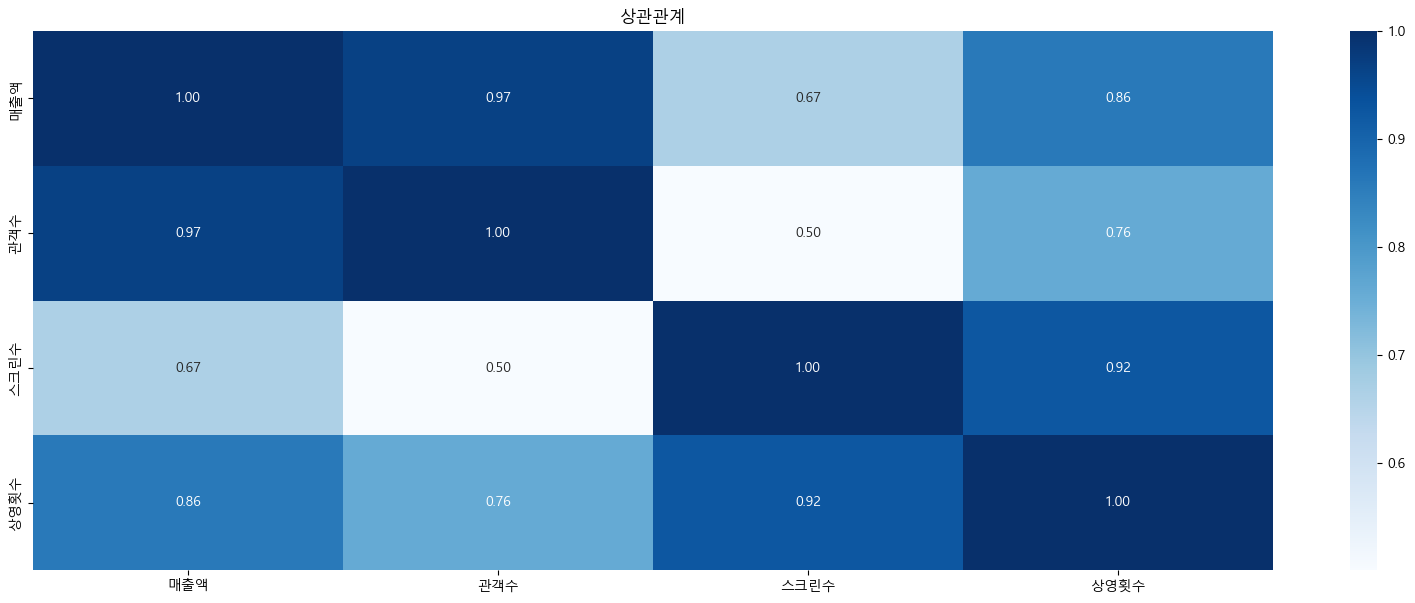

In [6]:
plt.figure(figsize=(20,7))
sns.heatmap(movie_year_info.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("상관관계")
plt.show()

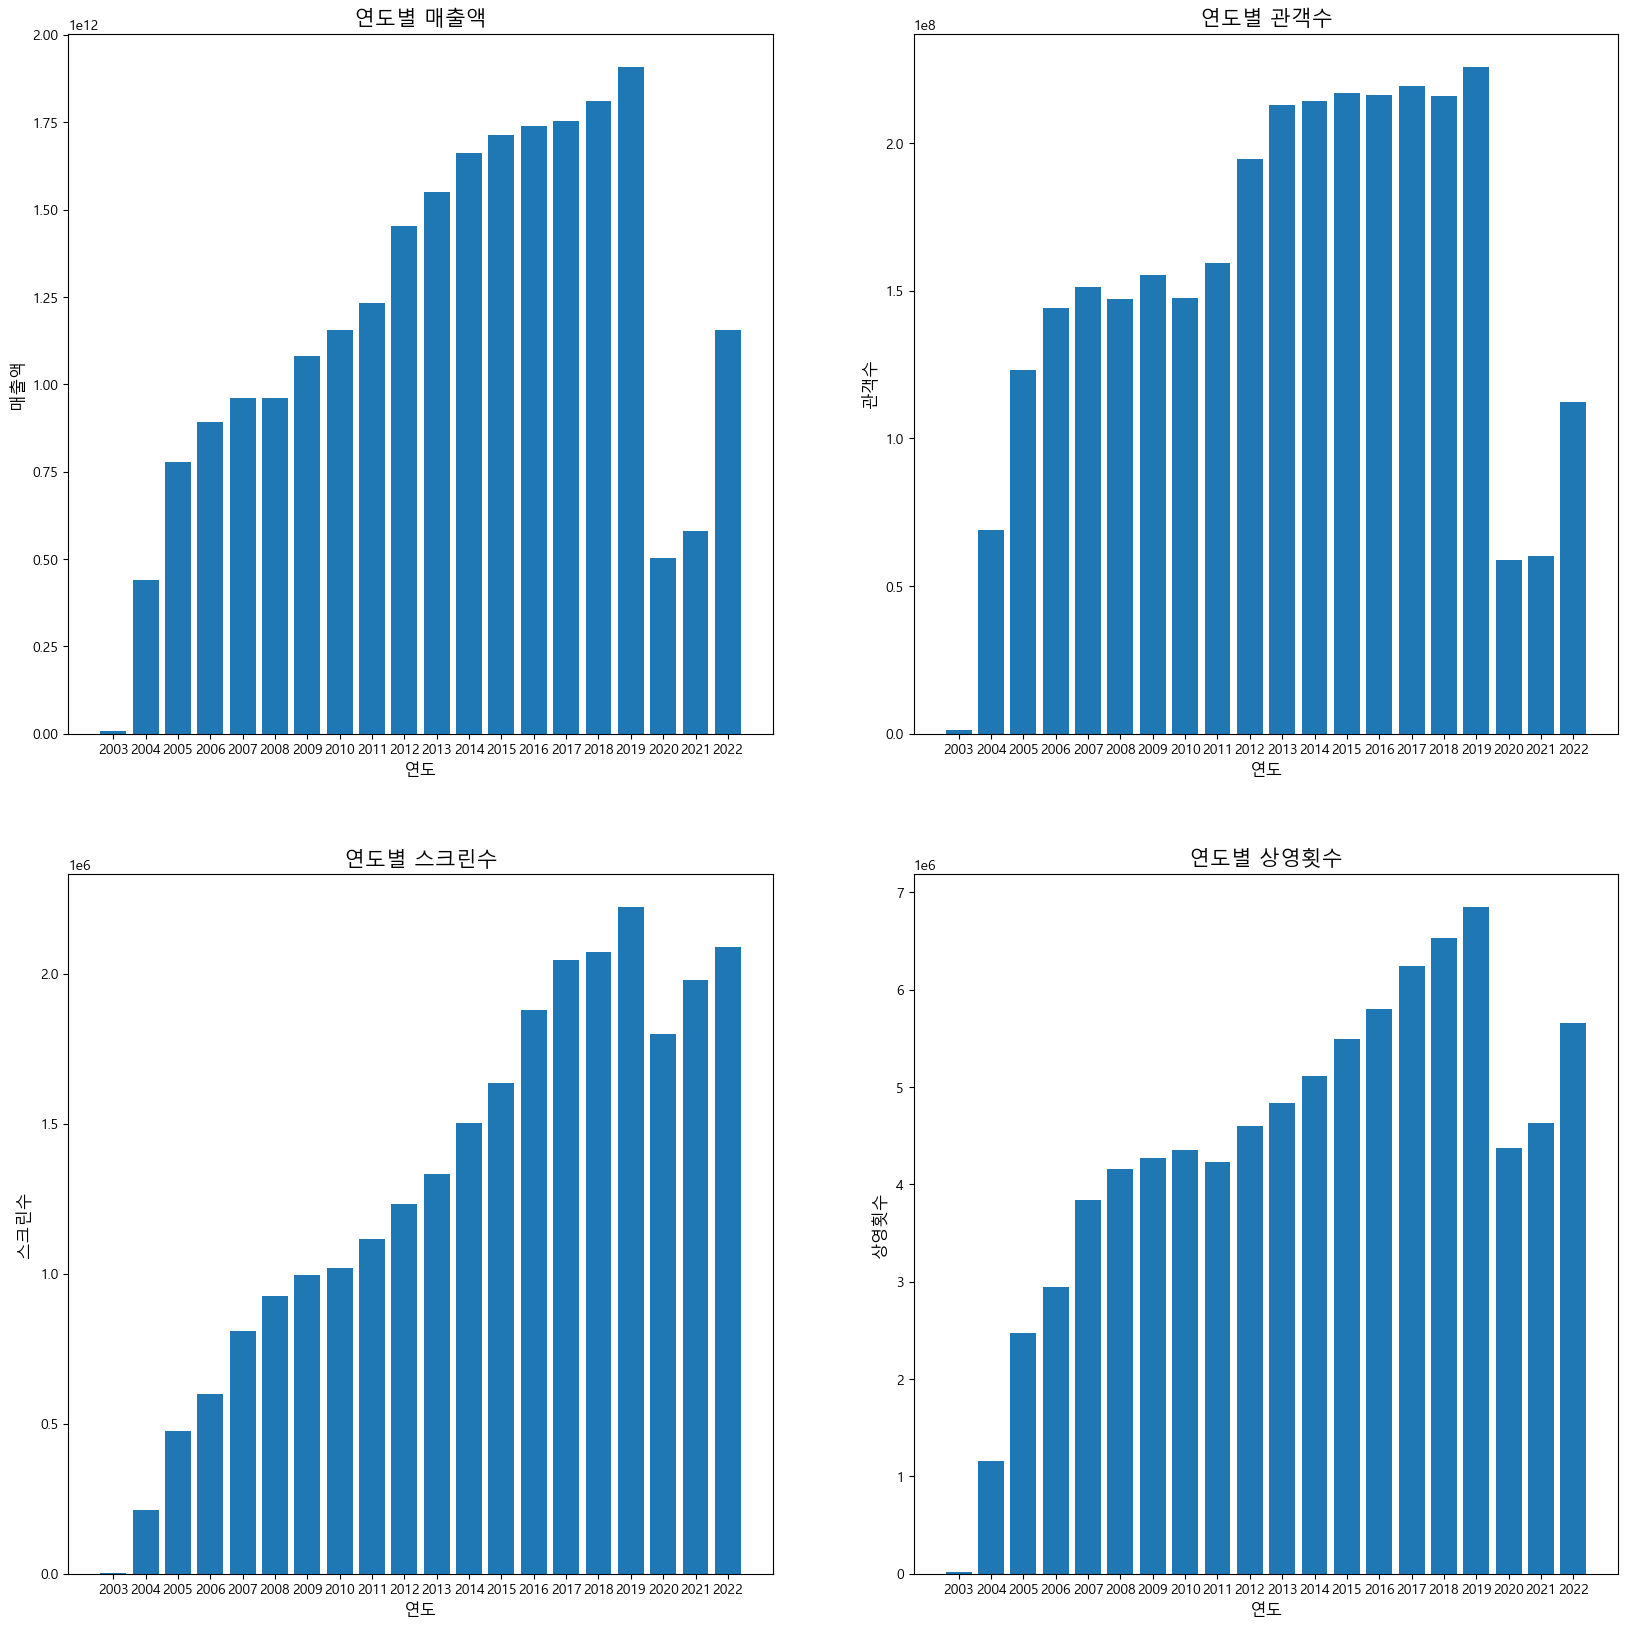

In [7]:
fig = plt.figure(figsize=(20,20))

year_list = list(map(lambda x : str(x),movie_year_info['매출액'].index.to_list()))

ax1 = fig.add_subplot(2,2,1)
ax1.bar(year_list, movie_year_info['매출액'].values)

ax1.set_title('연도별 매출액', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2 = fig.add_subplot(2,2,2)
ax2.bar(year_list, movie_year_info['관객수'].values)

ax2.set_title('연도별 관객수', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('관객수',size=12)

ax3 = fig.add_subplot(2,2,3)
ax3.bar(year_list, movie_year_info['스크린수'].values)

ax3.set_title('연도별 스크린수', size=15)
ax3.set_xlabel('연도',size=12)
ax3.set_ylabel('스크린수',size=12)

ax4 = fig.add_subplot(2,2,4)
ax4.bar(year_list, movie_year_info['상영횟수'].values)

ax4.set_title('연도별 상영횟수', size=15)
ax4.set_xlabel('연도',size=12)
ax4.set_ylabel('상영횟수',size=12)

plt.show()

# 연도별로 월별 총매출 비교 분석

In [8]:
movie_year_month_info = movie_info.groupby(['기준연도','기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_year_month_info

매출액       관객수    스크린수    상영횟수
기준연도 기준월                                        
2003 1          633500       102       1       1
     11     2471407000    375980     779    4305
     12     6457634000   1011119    1702    9486
2004 1     19429676000   3076067    4902   26227
     2     19534622000   3113047    6134   30947
...                ...       ...     ...     ...
2022 8    152170620450  14936414  197023  565580
     9     99853919058   9765290  172686  494860
     10    60794296390   6137247  200852  492896
     11    63218960533   6346918  173477  448290
     12   157349956960  14134727  192179  485720

[231 rows x 4 columns]

In [9]:
movie_month_info = movie_info[movie_info["기준연도"]!=2003].groupby(['기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_month_info

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,2214847884537,293665486,2256908,7312636
2,1864168383186,247777950,2036882,6843355
3,1292278481343,170174643,2100580,6826646
4,1196389119840,156318059,1980749,6462762
5,1941236969280,249507021,2079095,7019290
6,1897763558407,242706013,2021231,7181066
7,2484745751569,322638257,2175158,7737201
8,3054377797345,400598998,2357422,8269616
9,1780087171860,231076694,2207091,7411203


In [11]:
movie_year_month_info

매출액       관객수    스크린수    상영횟수
기준연도 기준월                                        
2003 1          633500       102       1       1
     11     2471407000    375980     779    4305
     12     6457634000   1011119    1702    9486
2004 1     19429676000   3076067    4902   26227
     2     19534622000   3113047    6134   30947
...                ...       ...     ...     ...
2022 8    152170620450  14936414  197023  565580
     9     99853919058   9765290  172686  494860
     10    60794296390   6137247  200852  492896
     11    63218960533   6346918  173477  448290
     12   157349956960  14134727  192179  485720

[231 rows x 4 columns]

In [12]:
movie_year_month_info.loc[2004]

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,19429676000,3076067,4902,26227
2,19534622000,3113047,6134,30947
3,11776271500,1845235,6739,36863
4,20789576000,3301296,9977,55263
5,24631763900,3809595,10111,55605
6,42691947500,6654037,19510,106491
7,59632490000,9439409,22820,124907
8,62394220000,9820202,24206,136465
9,48649928500,7589619,24596,136681


In [18]:
import matplotlib.pyplot as plt
import random

# 랜덤한 색상 리스트 생성
def generate_random_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        # RGB 값 랜덤 생성
        r = random.random()
        g = random.random()
        b = random.random()
        color = (r, g, b)
        colors.append(color)
    return colors

# 랜덤한 색상 리스트 생성
num_colors = 19  # 원하는 색상 개수
colors = generate_random_colors(num_colors)

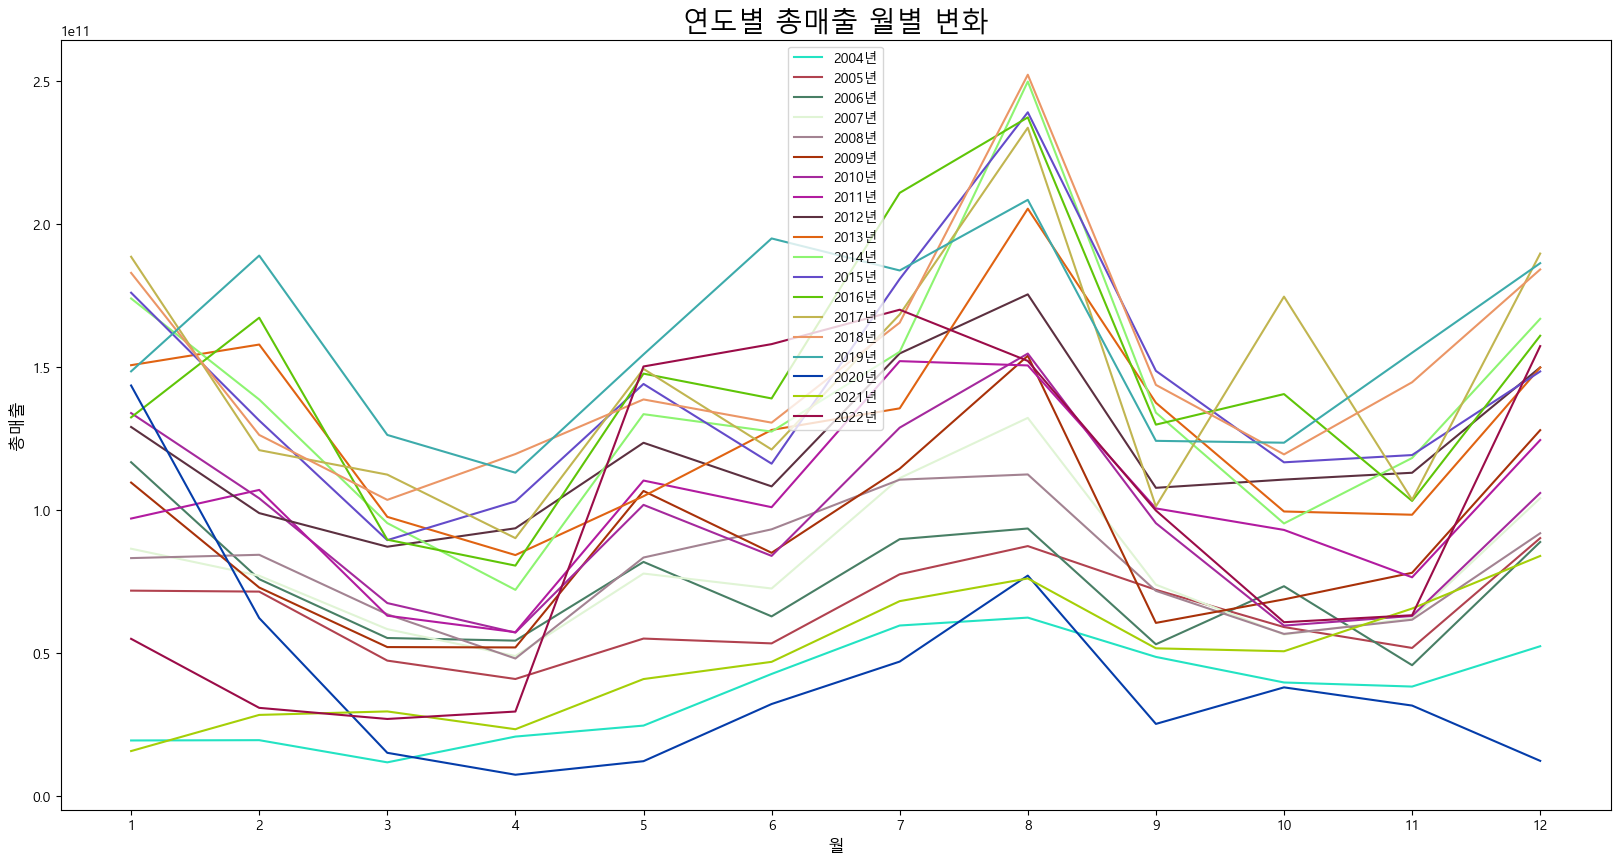

In [17]:
# 연도별 월별 총매출 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

year_list = range(2004,2023)
month_list = movie_year_month_info.loc[2022]['매출액'].index.map(lambda x: str(x)).to_list()

for i in range(len(year_list)):
    year = year_list[i]
    ax.plot(month_list,movie_year_month_info.loc[year]['매출액'], color=colors[i], label=f"{year}년")

# ax.plot(month_list,movie_year_month_info.loc[2018]['매출액'], color="pink", label="2018년")
# ax.plot(month_list,movie_year_month_info.loc[2019]['매출액'], color="hotpink", label="2019년")
# ax.plot(month_list,movie_year_month_info.loc[2020]['매출액'], color="skyblue", label="2020년")
# ax.plot(month_list,movie_year_month_info.loc[2021]['매출액'], color="royalblue", label="2021년")
# ax.plot(month_list,movie_year_month_info.loc[2022]['매출액'], color="darkslateblue", label="2022년")
# ax.plot(month_list[:4],movie_year_month_info_2023[:-1].loc[2023]['매출액'], color="crimson", label="2022년")

ax.legend(loc="best")
ax.set_title('연도별 총매출 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

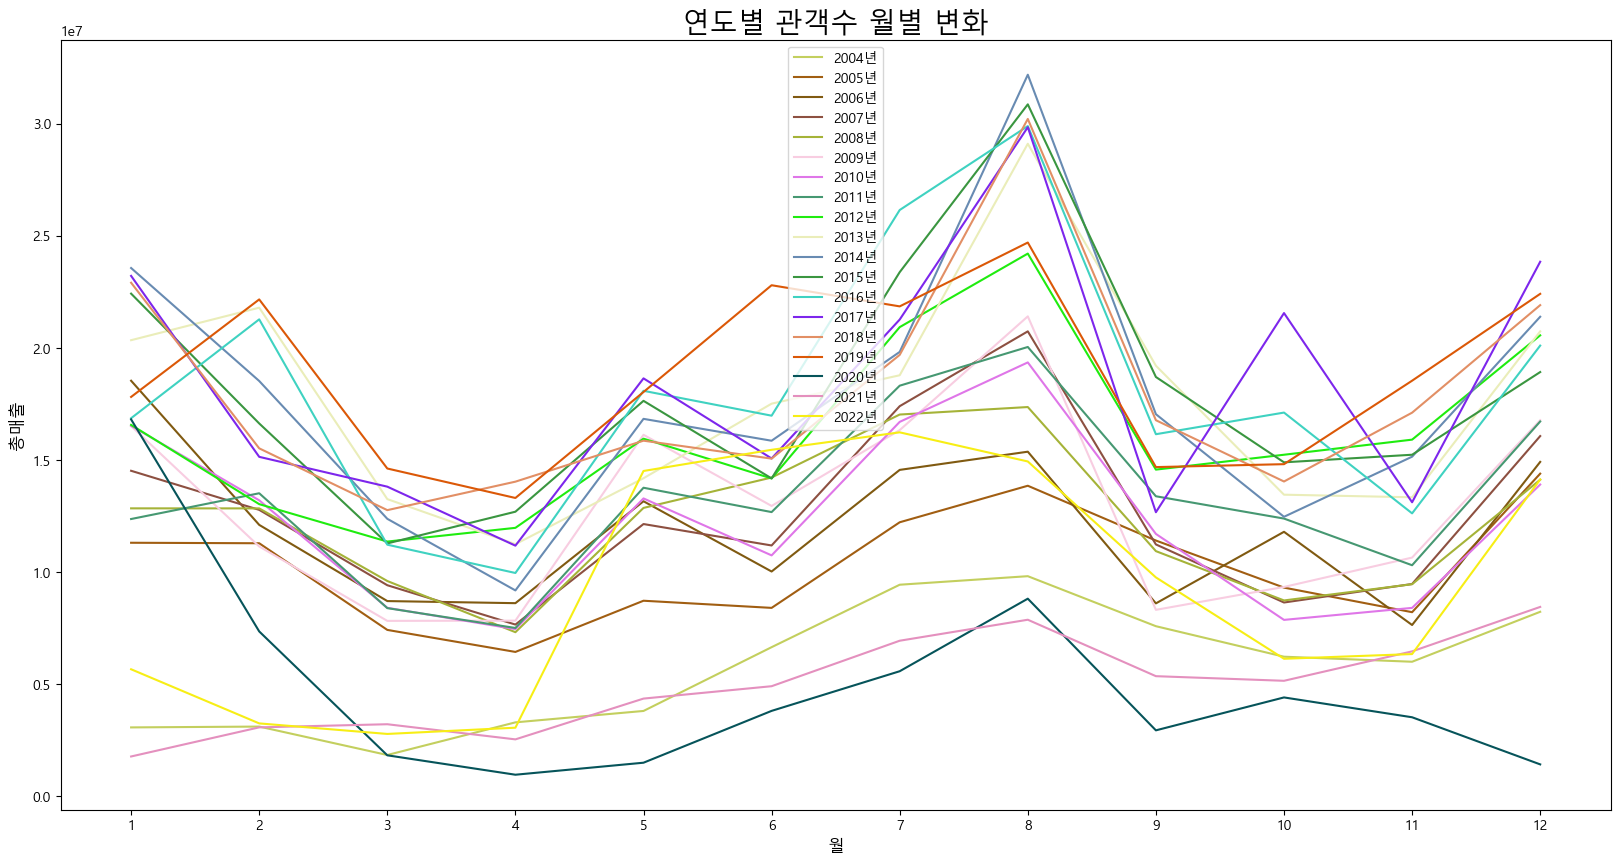

In [19]:
# 연도별 월별 관객수 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

year_list = range(2004,2023)
month_list = movie_year_month_info.loc[2022]['관객수'].index.map(lambda x: str(x)).to_list()

for i in range(len(year_list)):
    year = year_list[i]
    ax.plot(month_list,movie_year_month_info.loc[year]['관객수'], color=colors[i], label=f"{year}년")

# ax.plot(month_list,movie_year_month_info.loc[2018]['매출액'], color="pink", label="2018년")
# ax.plot(month_list,movie_year_month_info.loc[2019]['매출액'], color="hotpink", label="2019년")
# ax.plot(month_list,movie_year_month_info.loc[2020]['매출액'], color="skyblue", label="2020년")
# ax.plot(month_list,movie_year_month_info.loc[2021]['매출액'], color="royalblue", label="2021년")
# ax.plot(month_list,movie_year_month_info.loc[2022]['매출액'], color="darkslateblue", label="2022년")
# ax.plot(month_list[:4],movie_year_month_info_2023[:-1].loc[2023]['매출액'], color="crimson", label="2022년")

ax.legend(loc="best")
ax.set_title('연도별 관객수 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

# 관객수가 가장 많은달(8월)과 적은달(4월) 비교

## 월 관객수 10만명이 넘은 영화 장르

In [20]:
month_movie_audience = movie_df.groupby(["영화명","개봉일","기준연도","기준월"])["관객수"].sum().to_frame().reset_index()
month_movie_audience

,영화명,개봉일,기준연도,기준월,관객수
0,#살아있다,2020-06-24,2020,6,1194944
1,#살아있다,2020-06-24,2020,7,702431
2,#살아있다,2020-06-24,2020,8,6328
3,#살아있다,2020-06-24,2020,10,289
4,#아이엠히어,2021-01-14,2021,1,16290
...,...,...,...,...,...
60072,"힘을 내요, 미스터 리",2019-09-11,2019,11,1116
60073,"힘을 내요, 미스터 리",2019-09-11,2019,12,1095
60074,힙스터: 안개의 덫,2015-10-21,2015,10,1
60075,힛쳐,2007-08-01,2007,8,23025


In [21]:
April_audience_movie = month_movie_audience[month_movie_audience["기준월"]==4]
August_audience_movie = month_movie_audience[month_movie_audience["기준월"]==8]
April_audience_movie = April_audience_movie.sort_values(["관객수"],axis=0, ascending=False)
August_audience_movie = August_audience_movie.sort_values(["관객수"],axis=0, ascending=False)

In [35]:
April_audience_movie_top = April_audience_movie[April_audience_movie['관객수']>100000]
August_audience_movie_top = August_audience_movie[August_audience_movie['관객수']>100000]

In [36]:
April_audience_movie_top

,영화명,개봉일,기준연도,기준월,관객수
37130,어벤져스: 엔드게임,2019-04-24,2019,4,7331158
37137,어벤져스: 인피니티 워,2018-04-25,2018,4,5260282
37122,어벤져스: 에이지 오브 울트론,2015-04-23,2015,4,4664133
34955,아이언맨 3,2013-04-25,2013,4,3232651
24717,분노의 질주: 더 익스트림,2017-04-12,2017,4,3199324
...,...,...,...,...,...
3396,공포의 묘지,2019-04-10,2019,4,101915
25120,뷰티풀 선데이,2007-03-29,2007,4,101165
32763,신부들의 전쟁,2009-04-02,2009,4,100753
13907,뜨거운 피,2022-03-23,2022,4,100658


In [83]:
merge_df = movie_df[["영화명","개봉일","장르"]].drop_duplicates()
merge_df

,영화명,개봉일,장르
0,동갑내기 과외하기,2003-02-07,코미디
1,매트릭스3 레볼루션,2003-11-05,"SF,액션,범죄"
2,위대한 유산,2003-10-24,코미디
3,황산벌,2003-10-17,코미디
4,아이덴티티,2003-10-31,"범죄,스릴러"
...,...,...,...
482498,이스터 선데이,2022-12-28,"코미디,드라마"
482499,프린스 챠밍,2023-01-11,"애니메이션,판타지"
482582,희망의 요소,2022-12-29,멜로/로맨스
482585,겨울 이야기,2023-01-18,드라마


In [38]:
April_top = pd.merge(April_audience_movie_top,merge_df,
                     left_on = ["영화명","개봉일"],right_on = ["영화명","개봉일"], how='left')
August_top = pd.merge(August_audience_movie_top,merge_df,
                     left_on = ["영화명","개봉일"],right_on = ["영화명","개봉일"], how='left')

In [89]:
movie_genre = movie_df[['영화명','개봉일','기준연도','기준월','매출액','관객수','장르']].copy()
movie_genre.dropna(subset=["장르"],inplace=True)

In [90]:
genre = []
for li in movie_genre['장르'].unique():
    if ',' in li:
        pass
    else:
        genre.append(li)
len(genre)

19

In [41]:
# 장르별 컬럼 만들기
for col in genre:
    April_top[col]=0
    August_top[col]=0
    
April_top.head(3)
August_top.head(3)

,영화명,개봉일,기준연도,기준월,관객수,장르,코미디,사극,드라마,스릴러,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,명량,2014-07-30,2014,8,15539489,"사극,액션",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,신과함께-인과 연,2018-08-01,2018,8,12021793,"판타지,드라마",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,택시운전사,2017-08-02,2017,8,11538253,드라마,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
for col in genre:
    April_top[col]=April_top["장르"].apply(lambda x: 1 if col in x else 0)
    August_top[col]=August_top["장르"].apply(lambda x: 1 if col in x else 0)

In [43]:
April_top.head(2)

,영화명,개봉일,기준연도,기준월,관객수,장르,코미디,사극,드라마,스릴러,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,어벤져스: 엔드게임,2019-04-24,2019,4,7331158,"액션,SF",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,어벤져스: 인피니티 워,2018-04-25,2018,4,5260282,"액션,어드벤처,판타지,SF",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
April_top

,영화명,개봉일,기준연도,기준월,관객수,장르,코미디,사극,드라마,스릴러,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,어벤져스: 엔드게임,2019-04-24,2019,4,7331158,"액션,SF",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,어벤져스: 인피니티 워,2018-04-25,2018,4,5260282,"액션,어드벤처,판타지,SF",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,어벤져스: 에이지 오브 울트론,2015-04-23,2015,4,4664133,"액션,어드벤처,판타지,SF",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,아이언맨 3,2013-04-25,2013,4,3232651,"액션,어드벤처,SF",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,분노의 질주: 더 익스트림,2017-04-12,2017,4,3199324,"액션,범죄,스릴러",0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,공포의 묘지,2019-04-10,2019,4,101915,"공포(호러),스릴러",0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
235,뷰티풀 선데이,2007-03-29,2007,4,101165,스릴러,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
236,신부들의 전쟁,2009-04-02,2009,4,100753,"코미디,멜로/로맨스",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,뜨거운 피,2022-03-23,2022,4,100658,"범죄,드라마",0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
April_genre_df = April_top.iloc[:,6:]
April_total_genre = April_genre_df.sum(axis=0)
April_total_genre.sort_values(ascending=False, inplace=True)
April_total_genre_df = April_total_genre[:10]
April_total_genre_df['others'] = April_total_genre[10:].sum(axis=0)

August_genre_df = August_top.iloc[:,6:]
August_total_genre = August_genre_df.sum(axis=0)
August_total_genre.sort_values(ascending=False, inplace=True)
August_total_genre_df = August_total_genre[:10]
August_total_genre_df['others'] = August_total_genre[10:].sum(axis=0)

In [95]:
# 색상 맵 선택
cmap = cm.get_cmap('tab20c')
colors = cmap(np.array(range(1,50)))

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1204\1826526935.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


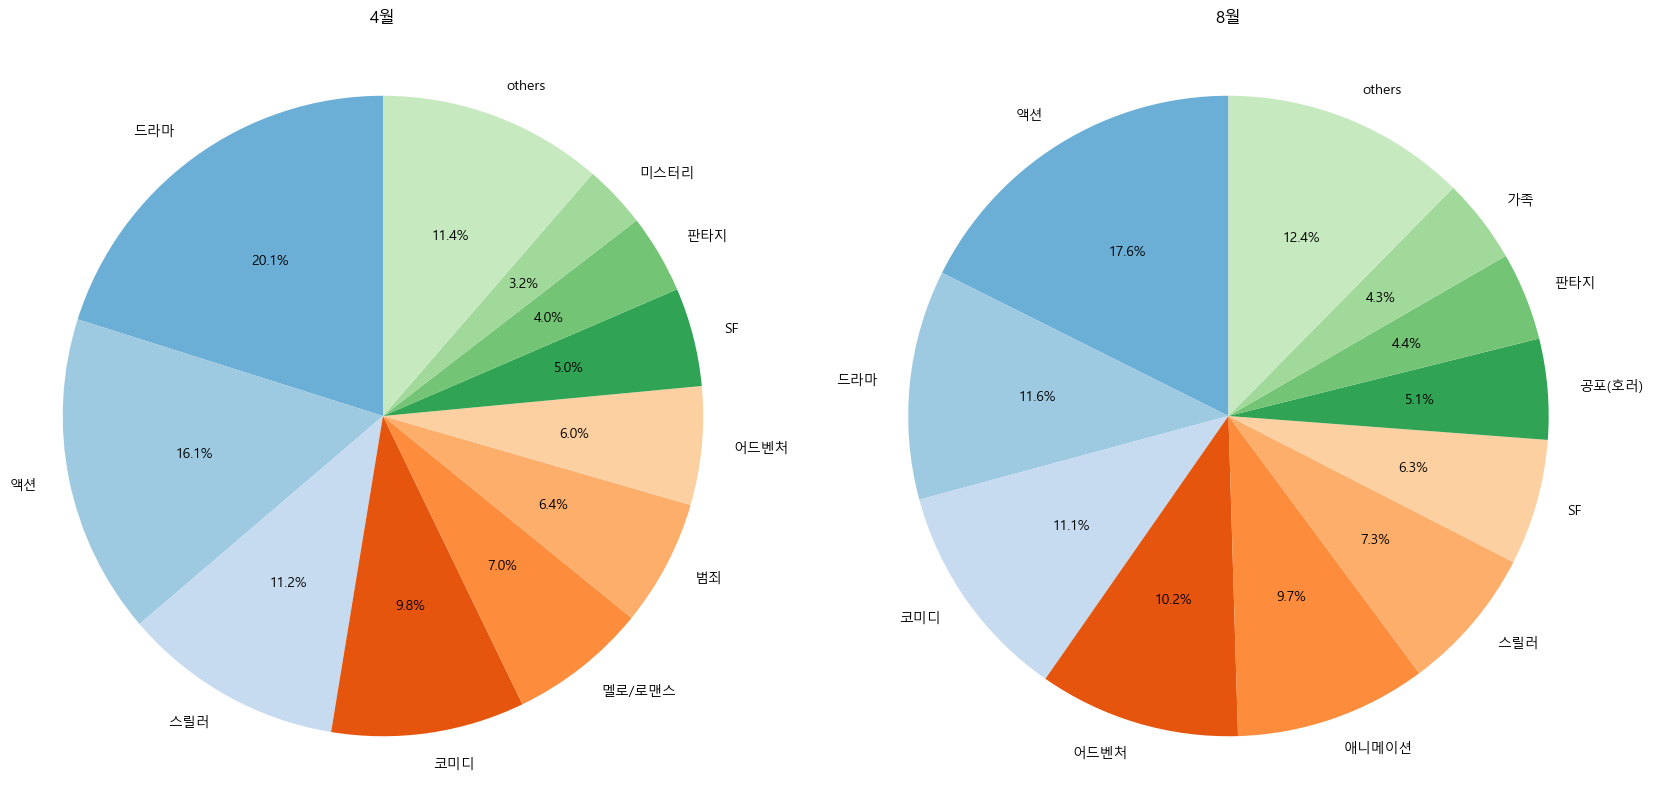

In [50]:
# 관객수 많은 영화 장르 비교
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(April_total_genre_df.values.flatten(), labels=April_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.pie(August_total_genre_df.values.flatten(), labels=August_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax1.set_title('4월')
ax1.axis('equal')
ax2.set_title('8월')
ax2.axis('equal')

plt.show()

## 4월과 8월에 개봉한 영화 장르

In [53]:
open_movie = movie_df[['영화명','개봉일','개봉연도','개봉월','관객수','장르']].copy()
open_movie.drop_duplicates(inplace=True)
open_movie

,영화명,개봉일,개봉연도,개봉월,관객수,장르
0,동갑내기 과외하기,2003-02-07,2003,2,102,코미디
1,매트릭스3 레볼루션,2003-11-05,2003,11,870,"SF,액션,범죄"
2,위대한 유산,2003-10-24,2003,10,177,코미디
3,황산벌,2003-10-17,2003,10,116,코미디
4,아이덴티티,2003-10-31,2003,10,102,"범죄,스릴러"
...,...,...,...,...,...,...
482746,성적표의 김민영,2022-09-08,2022,9,87,드라마
482748,더 메뉴,2022-12-07,2022,12,107,스릴러
482749,양자경의 더 모든 날 모든 순간,2022-11-23,2022,11,276,"액션,코미디"
482750,캐리와 슈퍼콜라,2023-01-18,2023,1,295,애니메이션


In [54]:
open_movie_df = open_movie.groupby(["영화명","개봉일","개봉연도","개봉월"])["관객수"].sum().to_frame().reset_index().set_index('영화명')
open_movie_df

,개봉일,개봉연도,개봉월,관객수
영화명,,,,
#살아있다,2020-06-24,2020,6,1903979
#아이엠히어,2021-01-14,2021,1,16363
#위왓치유,2021-06-03,2021,6,1581
...ing,2003-11-28,2003,11,34308
0.0MHz,2019-05-29,2019,5,137293
...,...,...,...,...
"힘내세요, 병헌씨",2013-06-27,2013,6,3338
"힘을 내요, 미스터 리",2019-09-11,2019,9,1181754
힙스터: 안개의 덫,2015-10-21,2015,10,1


In [55]:
April_open_movie = open_movie_df[open_movie_df["개봉월"]==4]
August_open_movie = open_movie_df[open_movie_df["개봉월"]==8]
April_open_movie = April_open_movie.sort_values(["관객수"],axis=0, ascending=False)
August_open_movie = August_open_movie.sort_values(["관객수"],axis=0, ascending=False)

In [56]:
April_open_movie

,개봉일,개봉연도,개봉월,관객수
영화명,,,,
어벤져스: 엔드게임,2019-04-24,2019,4,13977174
어벤져스: 인피니티 워,2018-04-25,2018,4,11232736
어벤져스: 에이지 오브 울트론,2015-04-23,2015,4,10504408
아이언맨 3,2013-04-25,2013,4,9001608
캡틴 아메리카: 시빌 워,2016-04-27,2016,4,8678260
...,...,...,...,...
꽃잎,1996-04-05,1996,4,0
인터뷰,2000-04-01,2000,4,0
아벤고 공수군단,1982-04-24,1982,4,0


In [57]:
April_open = pd.merge(April_open_movie,merge_df,
                     left_on = ["영화명","개봉일"], right_on = ["영화명","개봉일"], how='left')
August_open = pd.merge(August_open_movie,merge_df,
                     left_on = ["영화명","개봉일"], right_on = ["영화명","개봉일"], how='left')

In [58]:
# 장르별 컬럼 만들기
for col in genre:
    April_open[col]=0
    August_open[col]=0
    
April_open.head(3)
August_open.head(3)

,영화명,개봉일,개봉연도,개봉월,관객수,장르,코미디,사극,드라마,스릴러,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,베테랑,2015-08-05,2015,8,13413185,"액션,드라마",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,신과함께-인과 연,2018-08-01,2018,8,12277617,"판타지,드라마",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,택시운전사,2017-08-02,2017,8,12189180,드라마,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
for col in genre:
    April_open[col]=April_open["장르"].apply(lambda x: 1 if col in x else 0)
    August_open[col]=August_open["장르"].apply(lambda x: 1 if col in x else 0)

In [60]:
April_open_genre_df = April_open.iloc[:,6:]
April_open_total_genre = April_open_genre_df.sum(axis=0)
April_open_total_genre.sort_values(ascending=False, inplace=True)
April_open_total_genre_df = April_open_total_genre[:10]
April_open_total_genre_df['others'] = April_open_total_genre[10:].sum(axis=0)


August_open_genre_df = August_open.iloc[:,6:]
August_open_total_genre = August_open_genre_df.sum(axis=0)
August_open_total_genre.sort_values(ascending=False, inplace=True)
August_open_total_genre_df = August_open_total_genre[:10]
August_open_total_genre_df['others'] = August_open_total_genre[10:].sum(axis=0)

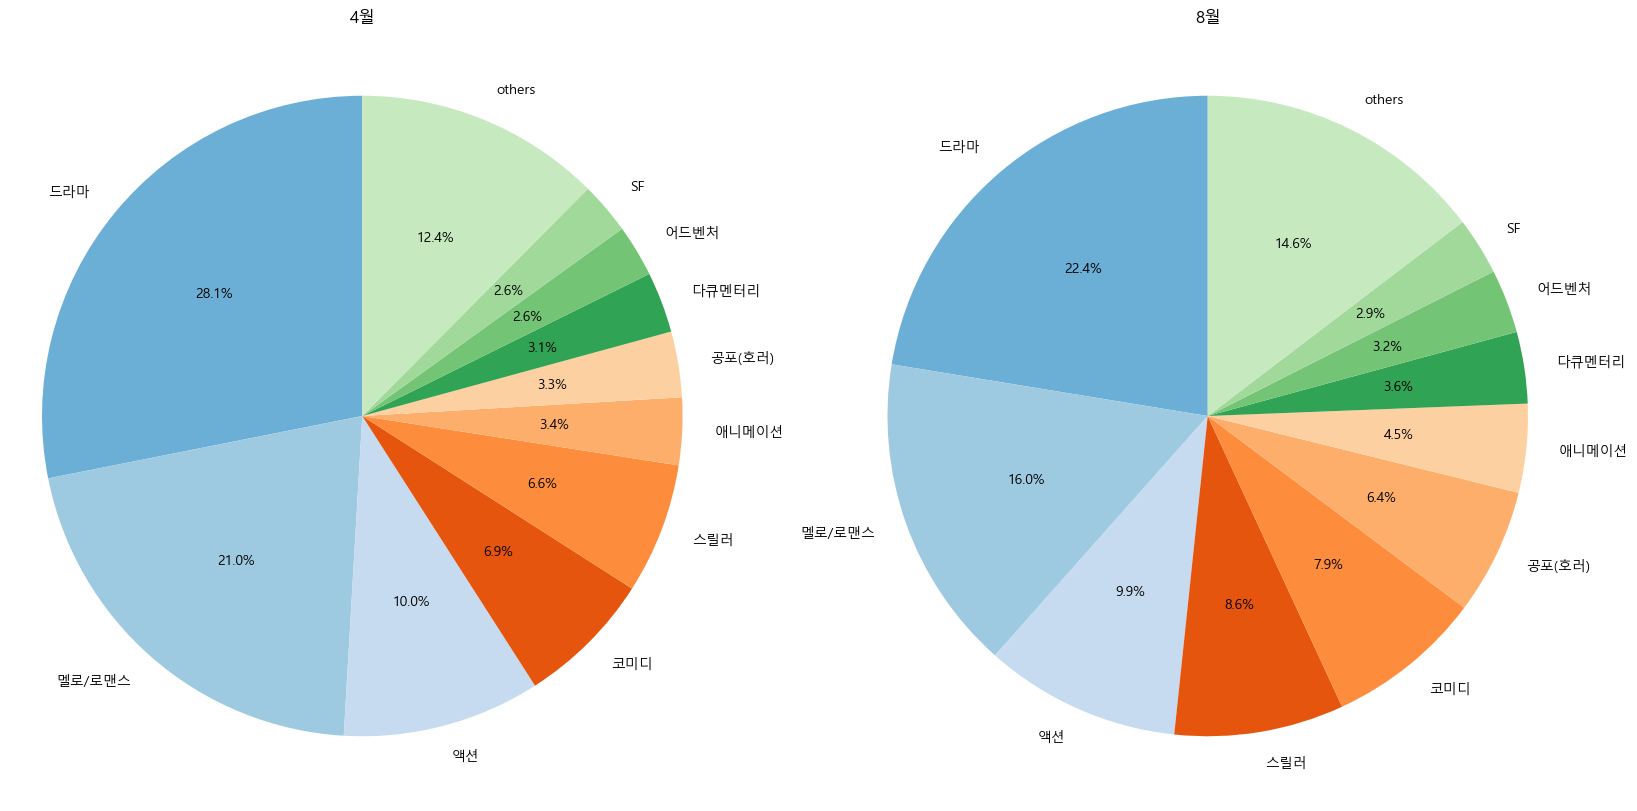

In [61]:
# 개봉한 영화 장르 비교
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(April_open_total_genre_df.values.flatten(), labels=April_open_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.pie(August_open_total_genre_df.values.flatten(), labels=August_open_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax1.set_title('4월')
ax1.axis('equal')
ax2.set_title('8월')
ax2.axis('equal')

plt.show()

# 역대 장르 비교

In [80]:
# 역대 장르
top_movie = pd.read_csv("누적관객수_백만명_이상_766개.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
top_movie['개봉일'] = pd.to_datetime(top_movie['개봉일'])
top_movie['기준일'] = pd.to_datetime(top_movie['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
top_movie['기준연도'] = top_movie['기준일'].apply(lambda x : x.year)
top_movie['기준월'] = top_movie['기준일'].apply(lambda x : x.month)
top_movie['개봉연도'] = top_movie['개봉일'].apply(lambda x : x.year)
top_movie['개봉월'] = top_movie['개봉일'].apply(lambda x : x.month)

top_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65794 entries, 0 to 65793
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      65794 non-null  int64         
 1   영화명     65794 non-null  object        
 2   개봉일     65794 non-null  datetime64[ns]
 3   등급      65794 non-null  object        
 4   장르      65794 non-null  object        
 5   대표국적    65794 non-null  object        
 6   국적      65794 non-null  object        
 7   제작사     42244 non-null  object        
 8   배급사     65739 non-null  object        
 9   감독      65794 non-null  object        
 10  배우      65732 non-null  object        
 11  기준일     65794 non-null  datetime64[ns]
 12  매출액     65794 non-null  int64         
 13  누적매출액   65794 non-null  int64         
 14  관객수     65794 non-null  int64         
 15  누적관객수   65794 non-null  int64         
 16  스크린수    65794 non-null  int64         
 17  상영횟수    65794 non-null  int64         
 18  기준연도  

In [81]:
top_movie_df = top_movie.groupby(['영화명','개봉일'])['누적관객수'].max().sort_values(ascending=False).to_frame()
top_movie_df

,,누적관객수
영화명,개봉일,
명량,2014-07-30,17615919
극한직업,2019-01-23,16266338
신과함께-죄와 벌,2017-12-20,14414658
국제시장,2014-12-17,14264478
어벤져스: 엔드게임,2019-04-24,13977602
...,...,...
밴티지 포인트,2008-02-28,1007729
존 윅 3: 파라벨룸,2019-06-26,1007383
맨 인 더 다크,2016-10-05,1003406


In [84]:
merge_df

,영화명,개봉일,장르
0,동갑내기 과외하기,2003-02-07,코미디
1,매트릭스3 레볼루션,2003-11-05,"SF,액션,범죄"
2,위대한 유산,2003-10-24,코미디
3,황산벌,2003-10-17,코미디
4,아이덴티티,2003-10-31,"범죄,스릴러"
...,...,...,...
482498,이스터 선데이,2022-12-28,"코미디,드라마"
482499,프린스 챠밍,2023-01-11,"애니메이션,판타지"
482582,희망의 요소,2022-12-29,멜로/로맨스
482585,겨울 이야기,2023-01-18,드라마


In [85]:
top_movie_df2 = pd.merge(top_movie_df,merge_df,
                     left_on = ["영화명","개봉일"], right_on = ["영화명","개봉일"], how='left')

In [86]:
merge_df2 = merge_df.copy()

In [91]:
# 장르별 컬럼 만들기
for col in genre:
    top_movie_df2[col]=0
    merge_df2[col]=0
    
top_movie_df2.head(3)

,영화명,개봉일,누적관객수,장르,코미디,사극,드라마,스릴러,액션,어드벤처,...,판타지,다큐멘터리,공포(호러),애니메이션,범죄,미스터리,뮤지컬,서부극(웨스턴),기타,가족
0,명량,2014-07-30,17615919,"사극,액션",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,극한직업,2019-01-23,16266338,코미디,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,신과함께-죄와 벌,2017-12-20,14414658,"판타지,드라마",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
for col in genre:
    top_movie_df2[col]=top_movie_df2["장르"].apply(lambda x: 1 if col in x else 0)
    merge_df2[col]=merge_df2["장르"].apply(lambda x: 1 if col in x else 0)

In [93]:
top_movie_genre_df = top_movie_df2.iloc[:,4:]
top_movie_total_genre = top_movie_genre_df.sum(axis=0)
top_movie_total_genre.sort_values(ascending=False, inplace=True)
top_movie_total_genre_df = top_movie_total_genre[:10]
top_movie_total_genre_df['others'] = top_movie_total_genre[10:].sum(axis=0)

merge_genre_df = merge_df2.iloc[:,3:]
merge_total_genre = merge_genre_df.sum(axis=0)
merge_total_genre.sort_values(ascending=False, inplace=True)
merge_total_genre_df = merge_total_genre[:10]
merge_total_genre_df['others'] = merge_total_genre[10:].sum(axis=0)

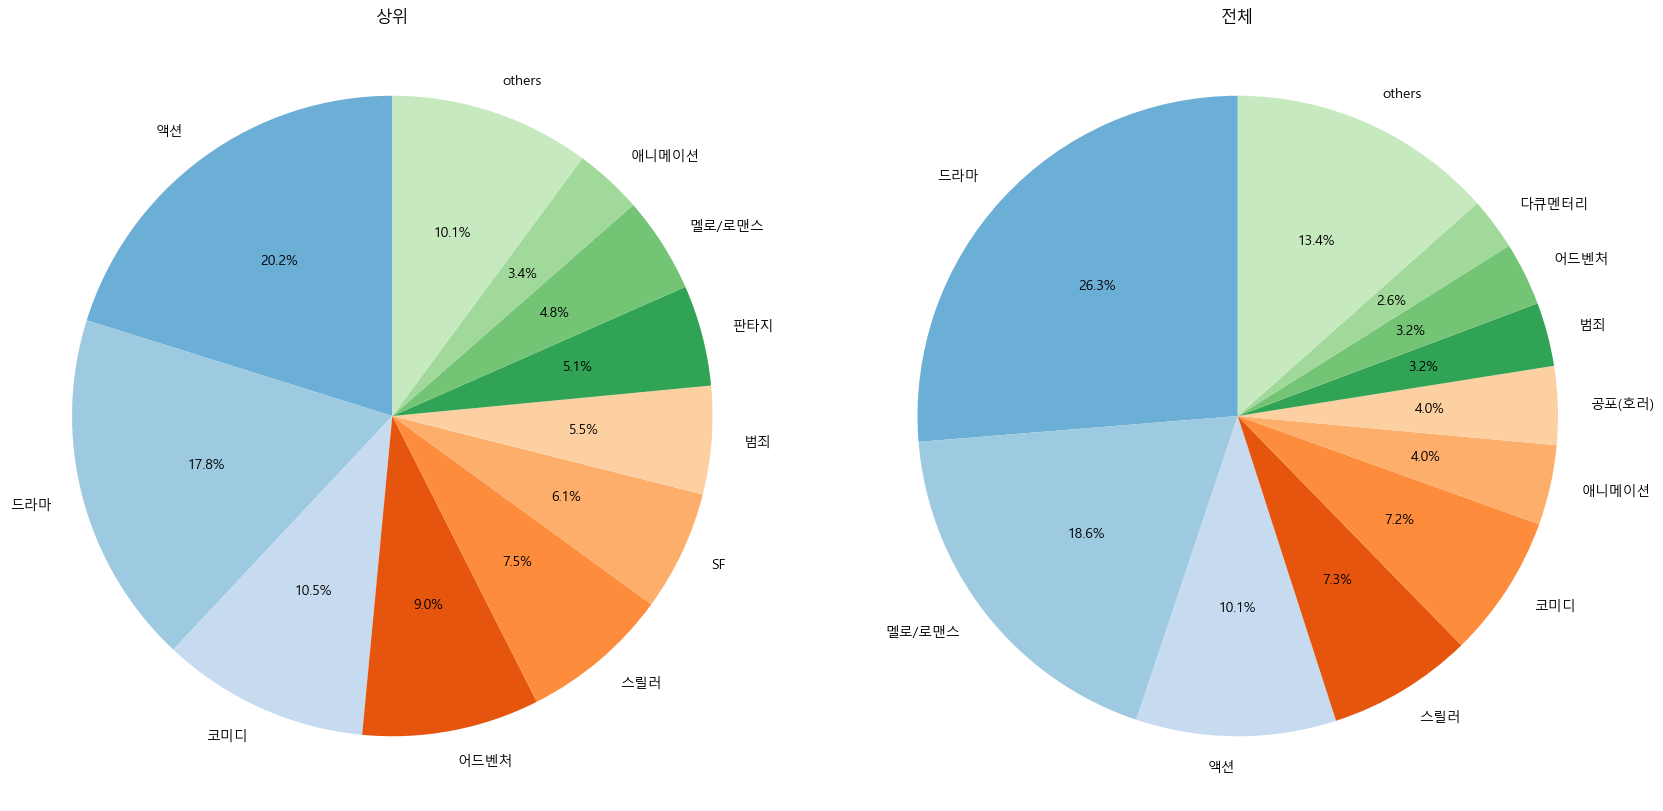

In [96]:
# 개봉한 영화 장르 비교
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(top_movie_total_genre_df.values.flatten(), labels=top_movie_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.pie(merge_total_genre_df.values.flatten(), labels=merge_total_genre_df.index, autopct='%1.1f%%', 
                        startangle=90, colors=colors)

ax1.set_title('상위')
ax1.axis('equal')
ax2.set_title('전체')
ax2.axis('equal')

plt.show()

In [97]:
top_movie_total_genre

액션          329
드라마         291
코미디         171
어드벤처        146
스릴러         123
SF           99
범죄           89
판타지          83
멜로/로맨스       79
애니메이션        56
가족           39
미스터리         35
사극           32
공포(호러)       23
전쟁           21
뮤지컬          10
다큐멘터리         3
서부극(웨스턴)      1
기타            1
dtype: int64

In [98]:
merge_total_genre

드라마         7885
멜로/로맨스      5573
액션          3029
스릴러         2200
코미디         2164
애니메이션       1209
공포(호러)      1189
범죄           964
어드벤처         960
다큐멘터리        792
SF           768
판타지          758
기타           642
미스터리         577
가족           480
전쟁           385
사극           191
뮤지컬          158
서부극(웨스턴)      72
dtype: int64

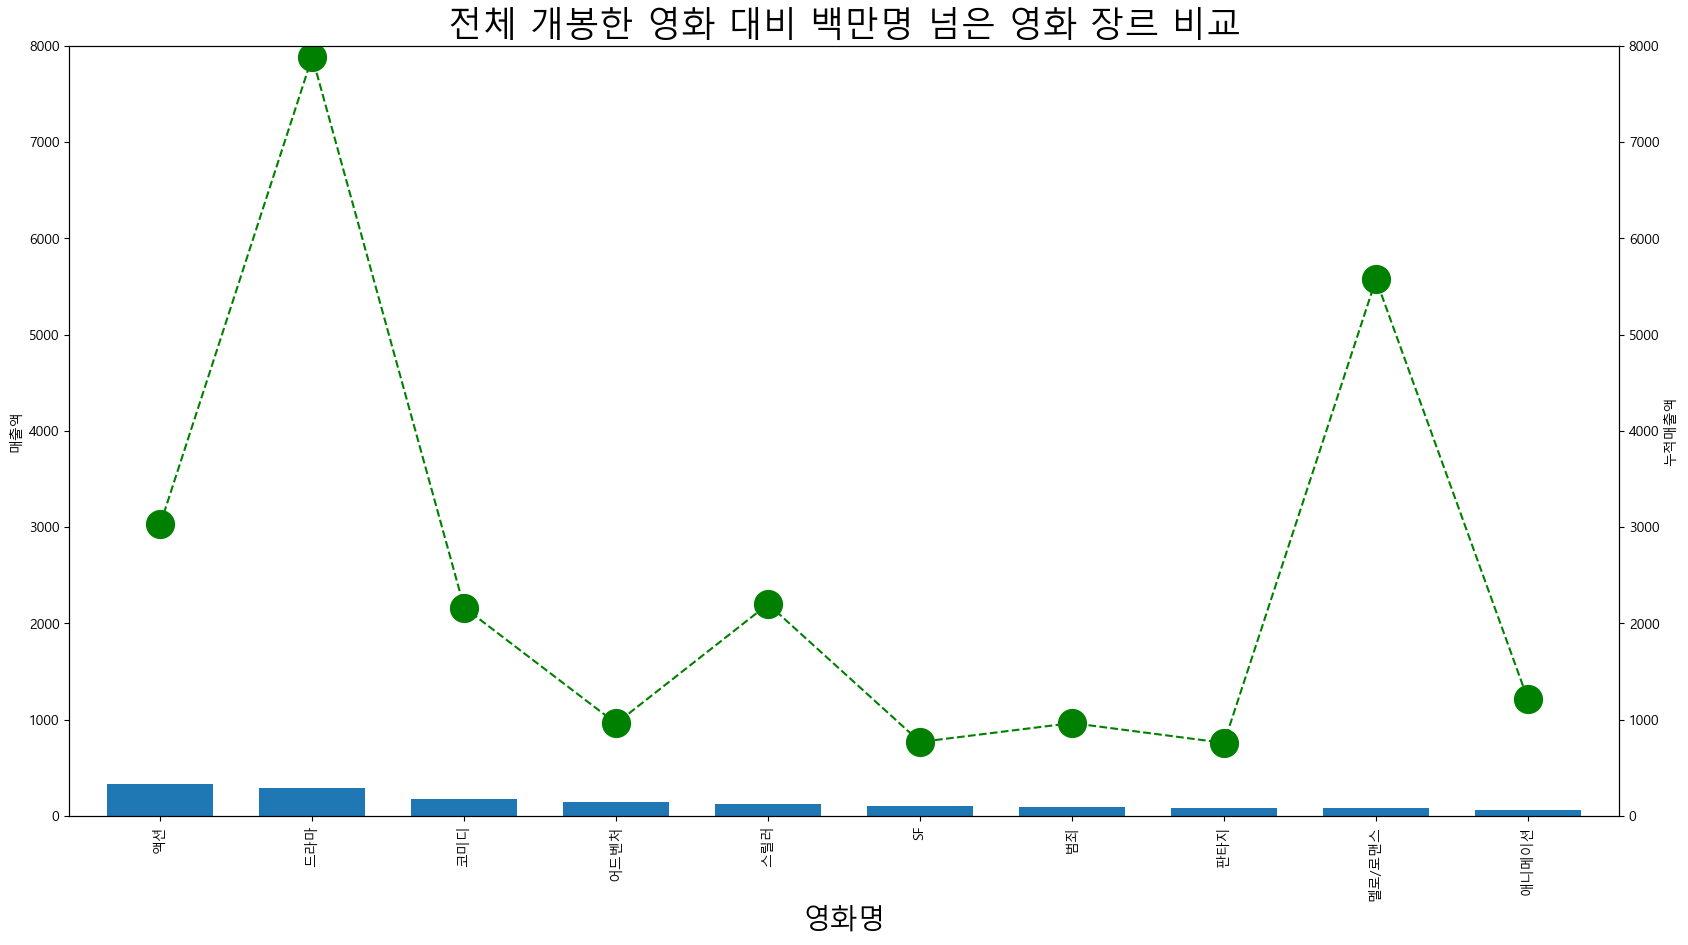

In [112]:
상위 = top_genre_df.sort_values(['상위'],ascending=False).set_index("장르")[:10]['상위']
전체 = top_genre_df.sort_values(['상위'],ascending=False).set_index("장르")[:10]['전체']

ax1 = 상위.plot(kind='bar', figsize=(20,10), width=0.7)
ax2 = ax1.twinx() # 여러 개의 그래프를 한 화면에 나타내기
ax2.plot(전체.index, 전체.values, ls='--', marker='o', markersize=20,
         color='green', label='누적매출액') 

ax1.set_ylim(0, 8000)
ax2.set_ylim(0, 8000)

ax1.set_xlabel('영화명', size=20)
ax1.set_ylabel('매출액')
ax2.set_ylabel('누적매출액')
plt.title('전체 개봉한 영화 대비 백만명 넘은 영화 장르 비교', size=25)
plt.show()

In [101]:
top_genre_df = pd.merge(top_movie_total_genre.to_frame().reset_index(), 
                        merge_total_genre.to_frame().reset_index(),
                        left_on = 'index', right_on = 'index', how='left')
top_genre_df.columns = ["장르","상위","전체"]
top_genre_df["비율"] = round((top_genre_df["상위"]/top_genre_df["전체"])*100,1)
top_genre_df.sort_values(['비율'],ascending=False)[:10]

,장르,상위,전체,비율
12,사극,32,191,16.8
3,어드벤처,146,960,15.2
5,SF,99,768,12.9
0,액션,329,3029,10.9
7,판타지,83,758,10.9
6,범죄,89,964,9.2
10,가족,39,480,8.1
2,코미디,171,2164,7.9
15,뮤지컬,10,158,6.3
11,미스터리,35,577,6.1


In [114]:
top_genre_df.sort_values(['비율'],ascending=False)

,장르,상위,전체,비율
12,사극,32,191,16.8
3,어드벤처,146,960,15.2
5,SF,99,768,12.9
0,액션,329,3029,10.9
7,판타지,83,758,10.9
6,범죄,89,964,9.2
10,가족,39,480,8.1
2,코미디,171,2164,7.9
15,뮤지컬,10,158,6.3
11,미스터리,35,577,6.1


# 연도별 개봉한 영화수

In [200]:
open_count = movie_df[['영화명','개봉일','개봉연도','개봉월']].copy()
open_count.drop_duplicates(inplace=True)

print(len(open_count))

18149


In [205]:
open_count_df1 = open_count.groupby(['개봉연도'])['영화명'].count()
open_count_df1

개봉연도
1936       1
1941       1
1946       1
1950       1
1954       1
        ... 
2019    1560
2020    1474
2021    1576
2022     646
2023      40
Name: 영화명, Length: 72, dtype: int64

In [206]:
open_count_df2 = open_count.groupby(['개봉월'])['영화명'].count()
open_count_df2

개봉월
1     1373
2     1298
3     1498
4     1518
5     1441
6     1417
7     1516
8     1520
9     1583
10    1549
11    1748
12    1688
Name: 영화명, dtype: int64

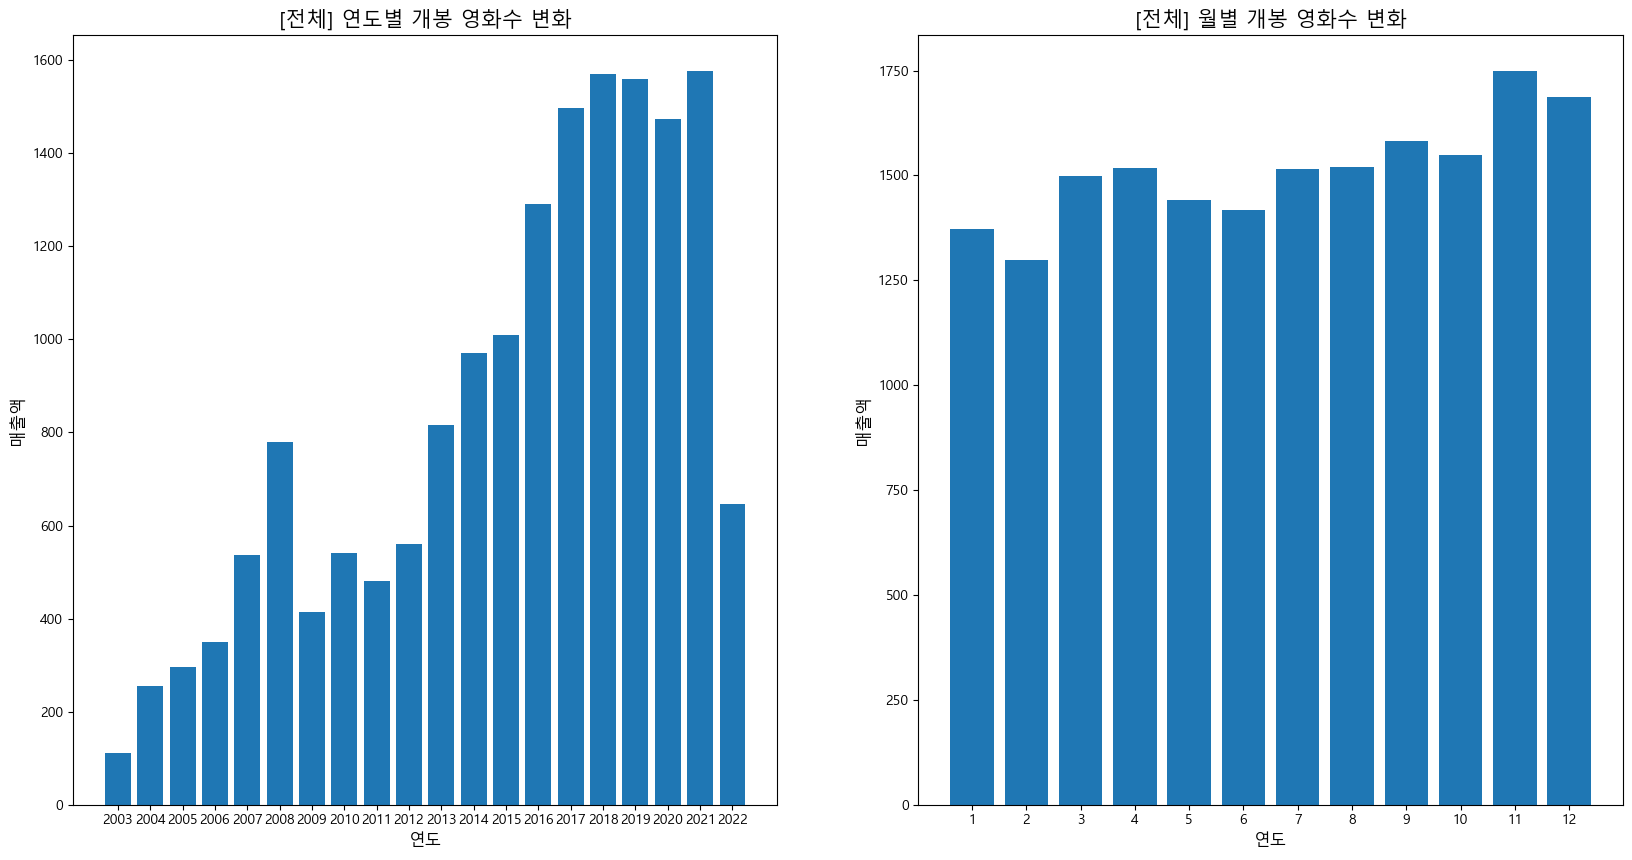

In [232]:
fig = plt.figure(figsize=(20,10))

# year_list = [str(year) for year in range(2004,2023)]
# month_list = [str(month) for month in range(1,13)]

ax1 = fig.add_subplot(1,2,1)
ax1.bar(open_count_df1.loc[2003:2022].index.astype('str'), open_count_df1.loc[2003:2022].values)

ax1.set_title('[전체] 연도별 개봉 영화수 변화', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2 = fig.add_subplot(1,2,2)
ax2.bar(open_count_df2.index.astype('str'), open_count_df2.values)

ax2.set_title('[전체] 월별 개봉 영화수 변화', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('매출액',size=12)

plt.show()

## 역대

In [238]:
top_open_count = top_movie[['영화명','개봉일','개봉연도','개봉월']].copy()
top_open_count.drop_duplicates(inplace=True)

print(len(top_open_count))

776


In [240]:
top_open_count_df1 = top_open_count.groupby(['개봉연도'])['영화명'].count()
top_open_count_df1

개봉연도
2003     1
2004    26
2005    37
2006    35
2007    42
2008    45
2009    40
2010    43
2011    43
2012    52
2013    53
2014    48
2015    47
2016    52
2017    55
2018    53
2019    50
2020    15
2021    17
2022    22
Name: 영화명, dtype: int64

In [241]:
top_open_count_df2 = top_open_count.groupby(['개봉월'])['영화명'].count()
top_open_count_df2

개봉월
1     69
2     55
3     40
4     51
5     68
6     66
7     85
8     72
9     67
10    59
11    51
12    93
Name: 영화명, dtype: int64

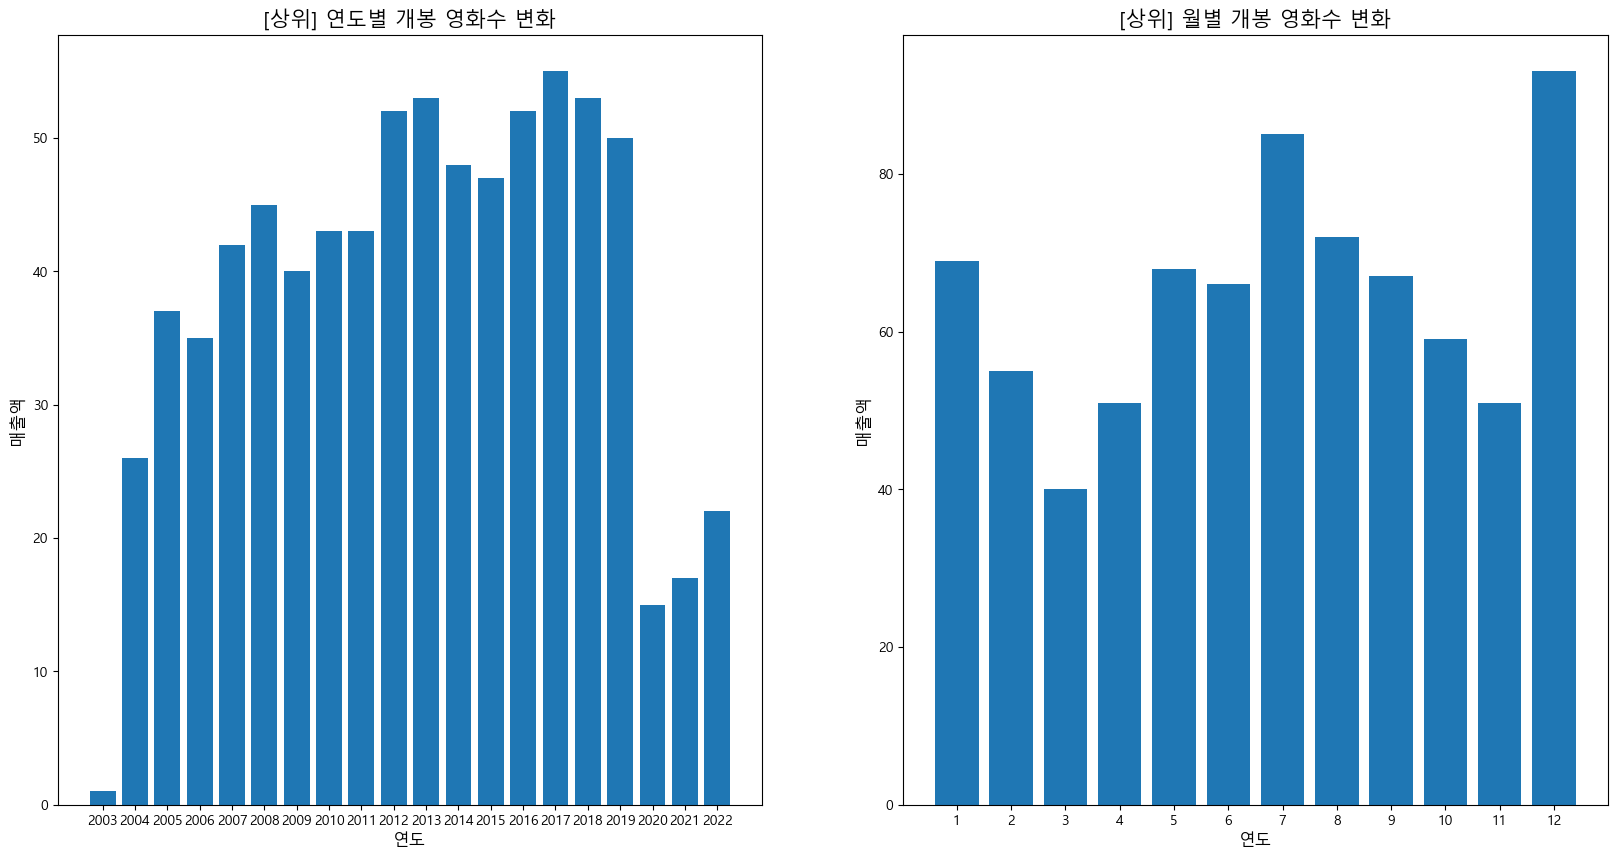

In [242]:
fig = plt.figure(figsize=(20,10))

# year_list = [str(year) for year in range(2004,2023)]
# month_list = [str(month) for month in range(1,13)]

ax1 = fig.add_subplot(1,2,1)
ax1.bar(top_open_count_df1.index.astype('str'), top_open_count_df1.values)

ax1.set_title('[상위] 연도별 개봉 영화수 변화', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2 = fig.add_subplot(1,2,2)
ax2.bar(top_open_count_df2.index.astype('str'), top_open_count_df2.values)

ax2.set_title('[상위] 월별 개봉 영화수 변화', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('매출액',size=12)

plt.show()

# 등급 전처리

In [4]:
movie_grade = movie_df[['영화명', '개봉일', '등급', '관객수']].copy()
movie_grade.isnull().sum()

영화명       0
개봉일       0
등급     6734
관객수       0
dtype: int64

In [5]:
movie_grade['등급'] = movie_grade['등급'].fillna("무등급")
movie_grade.isnull().sum()

영화명    0
개봉일    0
등급     0
관객수    0
dtype: int64

In [6]:
movie_grade.groupby(['영화명','개봉일','등급'])['관객수'].count().to_frame().groupby(['등급'])['관객수'].count().to_frame().sort_values(['관객수'],ascending=False)

,관객수
등급,
청소년관람불가,6895
15세이상관람가,4160
12세이상관람가,2359
전체관람가,1955
무등급,857
15세관람가,441
12세관람가,288
18세관람가,266
연소자관람불가,211


In [7]:
movie_df[movie_df['등급']=='15세관람가']["영화명"].unique()

array(['매트릭스3 레볼루션', '위대한 유산', '황산벌', '아이덴티티', '최후의 만찬', '프렌치 아메리칸',
       '웰컴 투 콜린우드', '오구', '싸이퍼', '천년호', '무간도2 - 혼돈의 시대', '미스틱 리버', '야마카시',
       '동해물과 백두산이', '호미사이드', '해피 에로 크리스마스', '실미도', '스노우 보더', '라스트 사무라이',
       '말죽거리 잔혹사', '자토이치', '페이첵', '그녀를 모르면 간첩', '런어웨이', '태극기 휘날리며', '베이직',
       '목포는 항구다', '러브 미 이프 유 대어', '사랑할 때 버려야 할 아까운 것들', '머나먼 사랑',
       '콜드 마운틴', '사랑도 통역이 되나요?', '실종', '8명의 여인들', '타임라인', '베로니카 게린',
       '브링 다운 더 하우스', '휴먼 스테인', '아웃 오브 타임', '어깨동무', '고독이 몸부림칠 때', '씬',
       '허니', '맹부삼천지교', '패션 오브 크라이스트', '마지막 늑대', '폴리와 함께', '고티카', '바람의 전설',
       '배틀로얄 2 - 레퀴엠', '연애사진', '네드 켈리', '오토기리소우', '고하토', '강령',
       '더티 댄싱 - 하바나 나이트', '효자동 이발사', '엄마는 여자를 좋아해', '펀치 드렁크 러브',
       '스페니쉬 아파트먼트', '알게 될거야', '하류인생', '트로이', '옹박 - 무에타이의 후예', '클레멘타인',
       '내 여자친구를 소개합니다', '디 아이2', '레이디킬러', '퀸카로 살아남는 법', '페이스', '나두야 간다',
       '공동경비구역 JSA', '아는 여자', '음양사2', '달마야, 서울 가자', '투 가이즈', '착신아리',
       '반 헬싱', '그놈은 멋있었다', '킹 아더', '화씨 911', '인형사', '본 슈프리머시', '분신사바',
       '나에게 유일

In [ ]:
movie_df['등급'].replace(['15세관람가', '12세이상관람가,15세이상관람가', '연소자관람불가,청소년관람불가', '12세관람가'],['15세이상관람가', '12세이상관람가', '청소년관람불가', '12세이상관람가'], inplace=True)


In [ ]:
{'12세관람가' : '12세이상관람가', ''}

In [8]:
raw_grade_list = movie_grade.groupby(['영화명','개봉일','등급'])['관객수'].count().to_frame().groupby(['등급'])['관객수'].count().to_frame().sort_values(['관객수'],ascending=False).index.to_list()
raw_grade_list

['청소년관람불가',
 '15세이상관람가',
 '12세이상관람가',
 '전체관람가',
 '무등급',
 '15세관람가',
 '12세관람가',
 '18세관람가',
 '연소자관람불가',
 '고등학생이상관람가',
 '연소자관람가',
 '중학생이상관람가',
 '국민학생관람불가',
 '18세 미만인 자는 관람할 수 없는 등급',
 '15세 미만인 자는 관람할 수 없는 등급',
 '고등학생이상관람가,15세이상관람가',
 '연소자관람불가,청소년관람불가',
 '미성년자관람불가',
 '15세이상관람가,중학생이상관람가',
 '15세관람가,15세이상관람가',
 '연소자관람가,전체관람가',
 '12세 미만인 자는 관람할 수 없는 등급',
 '12세이상관람가,12세관람가',
 '18세관람가,청소년관람불가',
 '모든 관람객이 관람할 수 있는 등급',
 '연소자관람불가,15세이상관람가',
 '12세이상관람가,중학생이상관람가',
 '12세이상관람가,전체관람가',
 '미정',
 '청소년관람불가,15세이상관람가',
 '18세관람가,15세이상관람가',
 '국민학생관람불가,15세이상관람가',
 '연소자관람가,15세이상관람가',
 '12세이상관람가,연소자관람가',
 '미성년자관람가',
 '12세이상관람가,고등학생이상관람가',
 '12세이상관람가,15세이상관람가',
 '고등학생이상관람가,청소년관람불가',
 '15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가',
 '15세이상관람가,18세 미만인 자는 관람할 수 없는 등급',
 '청소년관람불가,12세관람가',
 '12세이상관람가,15세 미만인 자는 관람할 수 없는 등급',
 '청소년관람불가,고등학생이상관람가',
 '제한상영가',
 '전체관람가,중학생이상관람가',
 '15세이상관람가,전체관람가',
 '12세이상관람가,연소자관람가,전체관람가',
 '12세이상관람가,국민학생관람불가',
 '12세이상관람가,국민학생관람불가,15세이상관람가',
 '15세이상관람가,미성년자관람불가',
 '모든 관람객이 관람할 수 있는 등급,전체관람가',
 '기타',
 '

In [46]:
def grade_(ls):
    if "12세" in ls:
        grade = "12세이상관람가"
    elif "15세" in ls:
        grade = "15세이상관람가"
    elif ("관람불가" in ls)|("18세" in ls):
        grade = "청소년관람불가"
    elif ("중학생이상" in ls)|("제한상영가" in ls):
        grade = "12세이상관람가"
    elif "고등학생이상" in ls:
        grade = "15세이상관람가"
    elif ("무등급" in ls)|("미정" in ls)|("기타" in ls):
        grade = "기타"
    else:
        grade = "전체관람가"
    return grade

In [47]:
raw_grade_df = movie_grade.groupby(['영화명','개봉일','등급'])['관객수'].count().to_frame().groupby(['등급'])['관객수'].count().to_frame().sort_values(['관객수'],ascending=False).reset_index()
raw_grade_df['등급수정']=raw_grade_df['등급'].apply(lambda x: grade_(x))
raw_grade_df

,등급,관객수,등급수정
0,청소년관람불가,6895,청소년관람불가
1,15세이상관람가,4160,15세이상관람가
2,12세이상관람가,2359,12세이상관람가
3,전체관람가,1955,전체관람가
4,무등급,857,기타
5,15세관람가,441,15세이상관람가
6,12세관람가,288,12세이상관람가
7,18세관람가,266,청소년관람불가
8,연소자관람불가,211,청소년관람불가
9,고등학생이상관람가,200,15세이상관람가


In [58]:
raw_grade_df[raw_grade_df['등급수정']=='12세이상관람가']

,등급,관객수,등급수정
2,12세이상관람가,2359,12세이상관람가
6,12세관람가,288,12세이상관람가
11,중학생이상관람가,92,12세이상관람가
21,12세 미만인 자는 관람할 수 없는 등급,11,12세이상관람가
22,"12세이상관람가,12세관람가",9,12세이상관람가
26,"12세이상관람가,중학생이상관람가",6,12세이상관람가
27,"12세이상관람가,전체관람가",6,12세이상관람가
33,"12세이상관람가,연소자관람가",2,12세이상관람가
35,"12세이상관람가,고등학생이상관람가",2,12세이상관람가
36,"12세이상관람가,15세이상관람가",2,12세이상관람가


In [60]:
movie_df[movie_df['등급']=='중학생이상관람가']["영화명"].unique()

array(['레닌그라드 카우보이 미국에 가다', '서편제', '꼴찌부터 일등까지 우리반을 찾습니다', '내 친구의 집은 어디인가',
       '올리브나무사이로', '기쁜 우리 젊은 날', '비정성시', '첫사랑', '야반가성', '기적', '서유기 월광보합',
       '닥터 지바고', '금지된 장난', '노틀담의 꼽추', '황금광 시대', '정복자 펠레', '세상의 모든 아침',
       '차이코프스키', '폭풍의 질주', '가위손', '천녀유혼', '천녀유혼 2-인간도', '그랑 부르', '제5원소',
       '축제', '사랑의 블랙홀', '사랑과 슬픔의 여로', '흐르는 강물처럼', '기연출사', '공작왕',
       '예스 마담3-중화전사', '빅', '마농의 샘', '레인맨', '헨리 5세', '폴리스 스토리',
       '폴리스 스토리 2 - 구룡의 눈', '폴리스 스토리3', 'A 계획 속집', '천녀유혼 3-도도도',
       '무장원 소걸아', '황비홍 2', '황비홍3-사왕쟁패', '길버트 그레이프', '소오강호', '비룡맹장',
       '시티 오브 조이', '파 앤드 어웨이', '가을날의 동화', '헛소동', '햄릿', '미세스 다웃파이어',
       '작은 아씨들', '나일의 대모험', '어퓨굿맨', '붉은 10월', '클리프 행어', '쿼터매인', '로보캅',
       '그린 파파야 향기', '볼케이노', '분노의 역류', '컷스로트 아일랜드', '제로니모', '귀주 이야기',
       '신부의 아버지', '완전한 세상', '데이라잇', '간디', '실베스타스텔론의 탈옥', '크로커다일 던디',
       '크로커다일 던디2', '1492 콜럼버스', '트윈스', '쓰리아미고', '비욘드 랭군', '햄버거 힐',
       '가면속의 아리아', '라밤바', '레드히트', '사랑의 기적', '특전대네이비 씰', '엄마는 해결사',
       '아폴로 13', '아팟치', '솔로몬의 딸', 

In [26]:
movie_df[movie_df['영화명']=='메리 포핀스']

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,기준연도,기준월,개봉연도,개봉월
283030,57,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,148000,148000,46,46,1,1,2017,3,1975,12
297385,57,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,362000,510000,50,96,1,1,2017,8,1975,12
298419,74,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,184000,694000,27,123,1,1,2017,8,1975,12
329809,35,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,609000,1303000,87,210,1,1,2018,7,1975,12
329973,50,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,616000,1919000,88,298,1,1,2018,7,1975,12
368680,28,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,646000,2565000,318,616,1,4,2019,9,1975,12
368765,29,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,857000,3422000,426,1042,1,4,2019,9,1975,12
368823,24,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,773000,4195000,379,1421,1,4,2019,9,1975,12
368924,34,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,390000,4585000,185,1606,1,4,2019,9,1975,12
378542,79,메리 포핀스,1975-12-24,미성년자관람가,"가족,드라마,코미디,판타지",미국,미국,NaN,NaN,로버트 스티븐슨,...,68000,4653000,34,1640,1,3,2019,12,1975,12


In [79]:
total_grade = pd.merge(movie_grade,raw_grade_df[['등급','등급수정']],
                       left_on = "등급", right_on = '등급', how='left')
total_grade_df = total_grade.groupby(["영화명","개봉일","등급수정"])["관객수"].max().to_frame()
total_grade_df.groupby(["등급수정"])["관객수"].agg(['count','sum'])

,count,sum
등급수정,,
12세이상관람가,2785,135152569
15세이상관람가,4910,146176963
기타,863,252292
전체관람가,2073,54805085
청소년관람불가,7518,41500866


In [78]:
top_grade = pd.merge(top_movie[['영화명', '개봉일', '등급', '관객수']].copy(),raw_grade_df[['등급','등급수정']],
                       left_on = "등급", right_on = '등급', how='left')
top_grade_df = top_grade.groupby(["영화명","개봉일","등급수정"])["관객수"].max().to_frame()
top_grade_df.groupby(["등급수정"])["관객수"].agg(['count','sum'])

,count,sum
등급수정,,
12세이상관람가,277,105315095
15세이상관람가,308,102511215
전체관람가,93,26342169
청소년관람불가,98,24526921
